# TruncatedNormal
how does this compare to a bounded variable?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm
import pandas as pd

%matplotlib inline
sns.set(font_scale=1.5)

In [8]:
data = np.random.normal(2, 2, size=20)
data = data[data > 0]
data

array([0.14568013, 2.54837666, 0.77564356, 0.2037265 , 1.36044847,
       2.49665803, 0.80871428, 2.05183848, 3.00514862, 1.66909572,
       3.0813126 , 1.45238379, 1.16459861, 1.73612704, 1.22713344,
       6.56894626, 2.15293012, 1.71000748, 1.32382677])

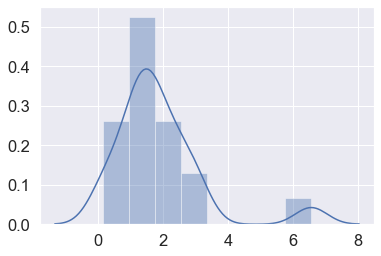

In [9]:
sns.distplot(data)

In [11]:
with pm.Model() as model:
    mean = pm.Uniform('mean', 0, 100)
    sd = pm.Uniform('sd', 0, 100)
    norm = pm.TruncatedNormal('norm', mu=mean, sigma=sd, lower=0)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [norm, sd, mean]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1054.77draws/s]
There were 111 divergences after tuning. Increase `target_accept` or reparameterize.
There were 81 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7193673915433556, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c29f03990>,
      dtype=object)

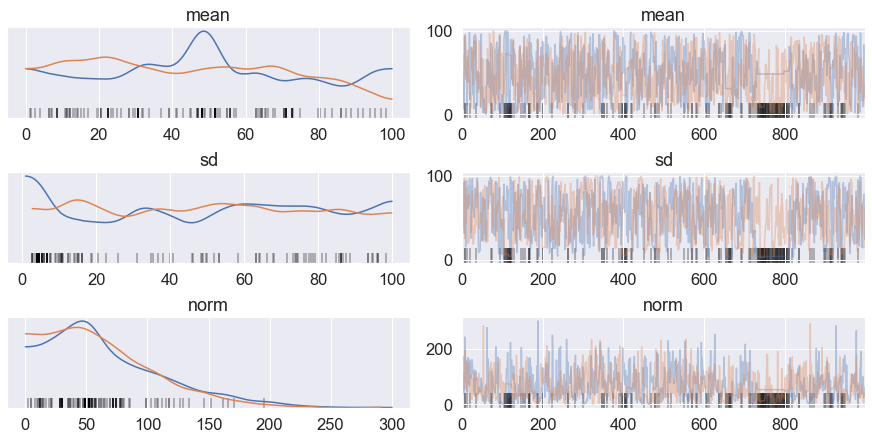

In [12]:
pm.traceplot(trace)

In [22]:
with pm.Model() as model:
    mean = pm.Uniform('mean', 0, 100)
    sd = pm.Uniform('sd', 0, 100)
    norm = pm.TruncatedNormal('norm', mu=mean, sigma=sd, lower=0, observed=data+10)
    trace = pm.sample(5000, tune=1000, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mean]
Sampling 2 chains: 100%|██████████| 12000/12000 [00:06<00:00, 1956.53draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a4781d0>,
      dtype=object)

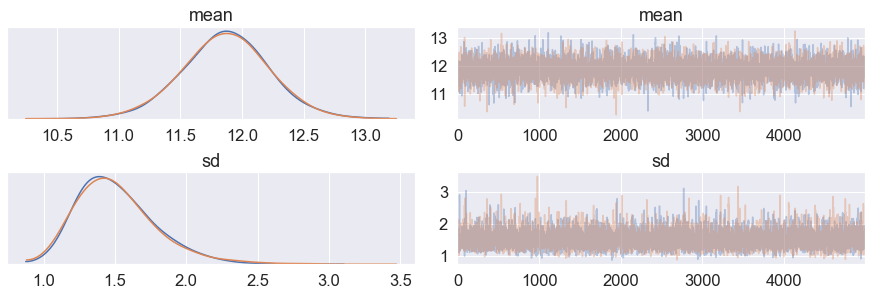

In [23]:
pm.traceplot(trace)

In [31]:
trace.get_values('mean')

array([12.05673274, 11.67734871, 12.04520494, ..., 11.48027536,
       12.008448  , 11.14983553])

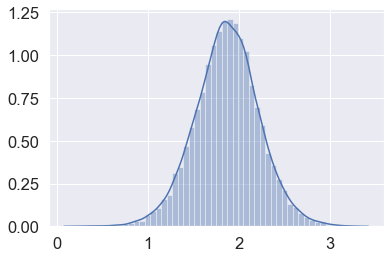

In [33]:
sns.distplot(trace.get_values('mean')-10)

In [34]:
pm.summary(trace)

/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mean,11.869117,0.350850,0.003859,11.126730,12.524384,6677.368375,0.999928
sd,1.515014,0.279144,0.003222,1.047906,2.084130,6297.734771,0.999980


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c30387e10>,
      dtype=object)

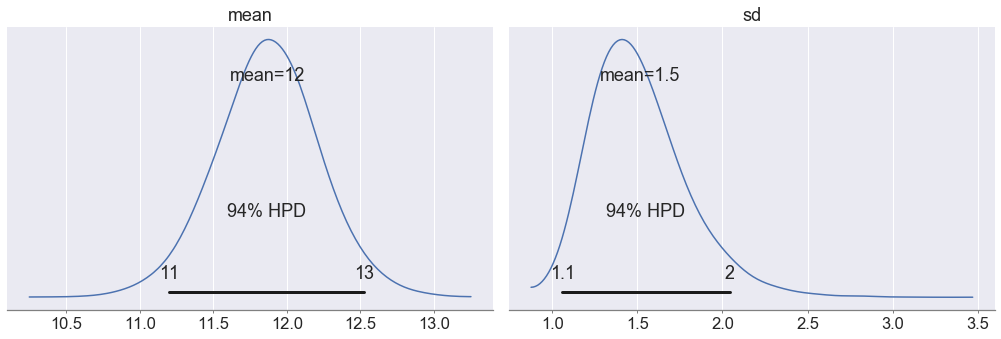

In [35]:
pm.plot_posterior(trace)